(29, 9)
         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80

array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='calcium', ylabel='calories'>,
        <Axes: xlabel='lipides', ylabel='calories'>,
        <Axes: xlabel='retinol', ylabel='calories'>,
        <Axes: xlabel='folates', ylabel='calories'>,
        <Axes: xlabel='proteines', ylabel='calories'>,
        <Axes: xlabel='cholesterol', ylabel='calories'>,
        <Axes: xlabel='magnesium', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='calcium', ylabel='sodium'>,
        <Axes: xlabel='lipides', ylabel='sodium'>,
        <Axes: xlabel='retinol', ylabel='sodium'>,
        <Axes: xlabel='folates', ylabel='sodium'>,
        <Axes: xlabel='proteines', ylabel='sodium'>,
        <Axes: xlabel='cholesterol', ylabel='sodium'>,
        <Axes: xlabel='magnesium', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='calc

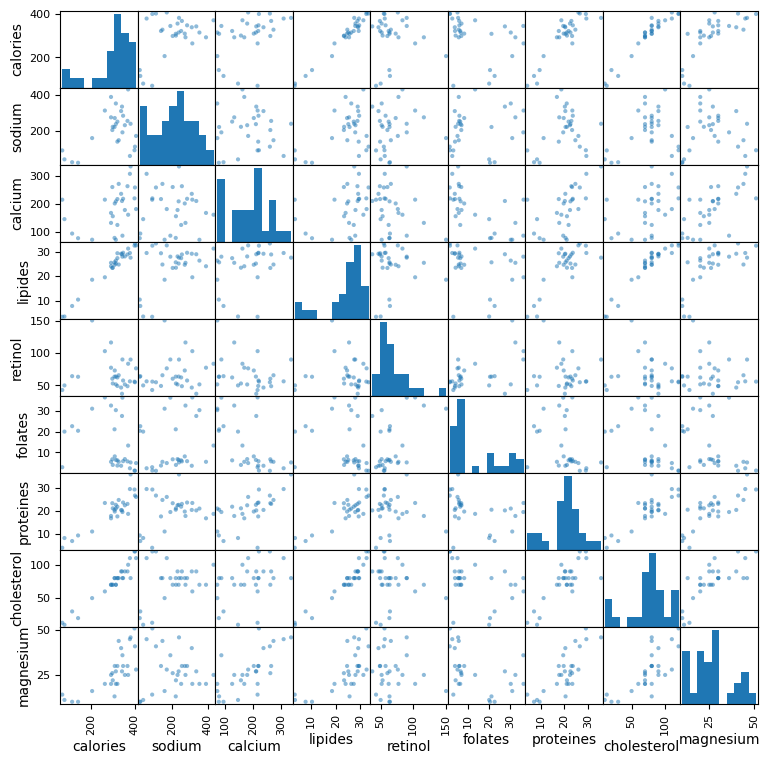

In [2]:
import pandas as pd

#importation des données 
fromage = pd.read_table(r".\fromage.txt",sep="\t",header=0,index_col=0)

#dimension des données 
print(fromage.shape)

#statistiques descriptives 
print(fromage.describe())

#graphique - croisement deux à deux des variables 
from pandas.plotting import scatter_matrix 
scatter_matrix(fromage,figsize=(9,9))


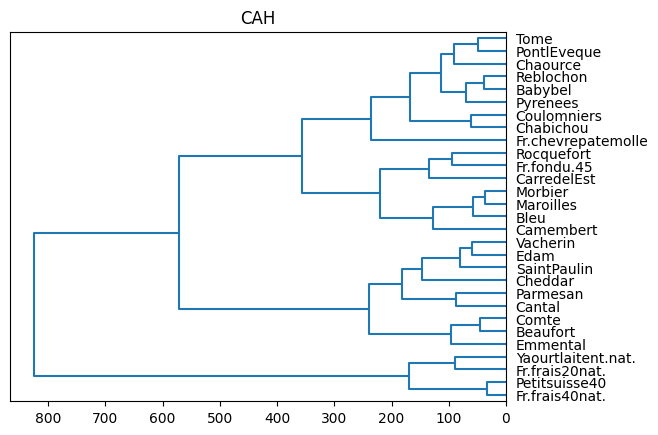

In [4]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des liens
Z = linkage(fromage,method='ward',metric='euclidean')

#affichage du dendrogramme 
plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=0) 
plt.show()


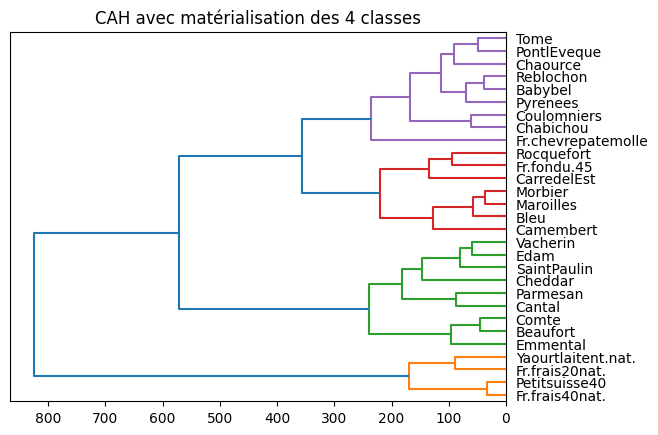

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1      Fr.frais20nat.
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
2               Comte
2            Beaufort
2             Cheddar
2              Cantal
2            Parmesan
2                Edam
2            Vacherin
2         SaintPaulin
2            Emmental
3         Fr.fondu.45
3         CarredelEst
3                Bleu
3          Rocquefort
3           Camembert
3             Morbier
3           Maroilles
4             Babybel
4         Coulomniers
4           Chabichou
4            Chaource
4  Fr.chevrepatemolle
4           Reblochon
4         PontlEveque
4            Pyrenees
4                Tome


In [5]:
#matérialisation des 4 classes (hauteur t = 250) 
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=250)
plt.show()

#découpage à la hauteur t = 250 ==> identifiants de 4 groupes 
groupes_cah = fcluster(Z,t=250,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes 
print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))
